In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [4]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(
    data=diabetes.data,
    columns=diabetes.feature_names
)
df["target"] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


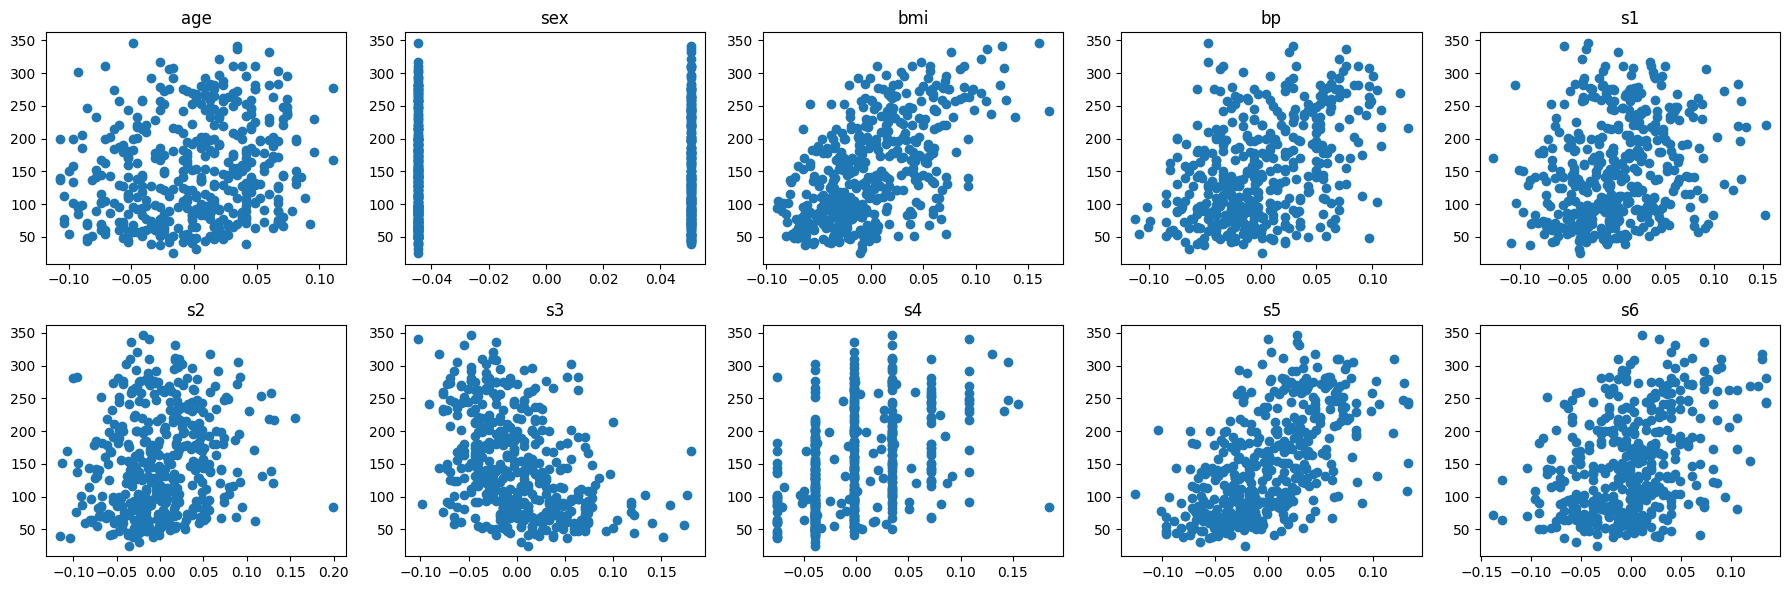

In [ ]:
plt.figure(figsize=(18,6))
for i, feature in enumerate(diabetes.feature_names, 1):
    plt.subplot(2, 5, i)
    plt.scatter(df[feature], df["target"])
    plt.title(feature)

plt.tight_layout()

In [8]:
X = df["bmi"].values.reshape(-1,1)
y = df["target"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
def linear_regression(x, y):
    x = np.array(x)
    y = np.array(y)

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)

    n = len(x)
    a = (sum_x * sum_y / n - sum_xy) / (sum_x**2 / n - sum_x2)
    b = (sum_y - a * sum_x) / n
    
    return a, b

In [36]:
a, b = linear_regression(X_train.squeeze().tolist(), y_train.tolist())
y_pred_lr = []
for x in X_test:
    y_pred_lr.append(b + a * float(x.item()))

In [21]:
print(f"Sklearn LinearRegression:\n\t{lr.intercept_}\n\t{lr.coef_}")
print(f"def linear_regression:\n\t{b}\n\t{a}")

Sklearn LinearRegression:
	152.28824927379569
	[981.65543614]
def linear_regression:
	152.28824927379569
	981.655436141193


Text(0, 0.5, 'target')

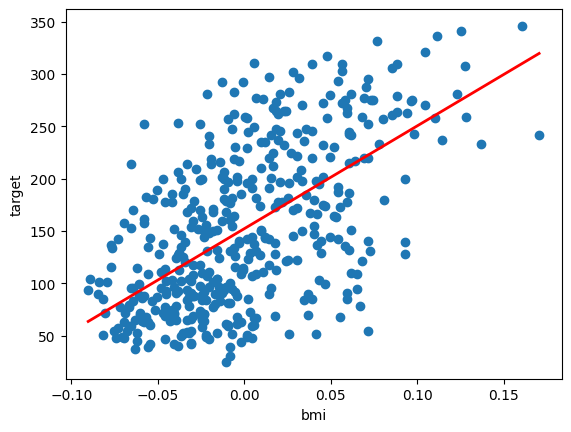

In [31]:
x = np.linspace(df['bmi'].min(), df['bmi'].max(), 100)
y = b + a * x 

plt.plot(x, y, c='r', linewidth=2)
plt.scatter(df["bmi"], df["target"])
plt.xlabel("bmi")
plt.ylabel("target")

In [35]:
df = pd.DataFrame({
    'Actual': y_test,
    'Sklearn': y_pred,
    'Custom LR': y_pred_lr
})
df

,Actual,Sklearn,Custom LR
0,321.0,255.174269,255.174269
1,215.0,211.794626,211.794626
2,127.0,161.008702,161.008702
3,64.0,129.267499,129.267499
4,175.0,196.982065,196.982065
...,...,...,...
84,104.0,64.727054,64.727054
85,49.0,82.713736,82.713736
86,103.0,194.865984,194.865984
87,142.0,166.298902,166.298902
